[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 9.35

Synthetic example showing the convergence of the distribution of the sum of i.i.d. continuous random variables with finite variance to a Gaussian distribution\
Topics: Central limit theorem, convolution, sum of independent random variables

Author: Carlos Fernandez-Granda

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
from scipy.stats import norm

font_size = 15
font_size_legend = 15
font_size_ticks = 15

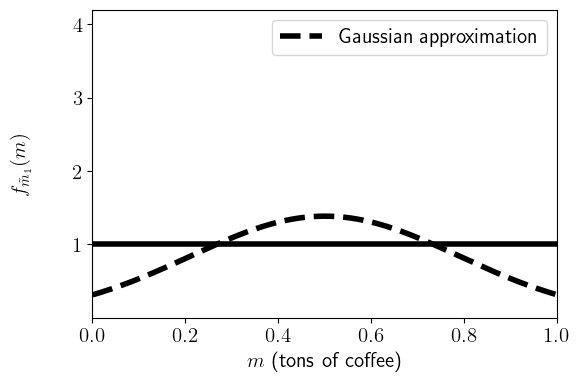

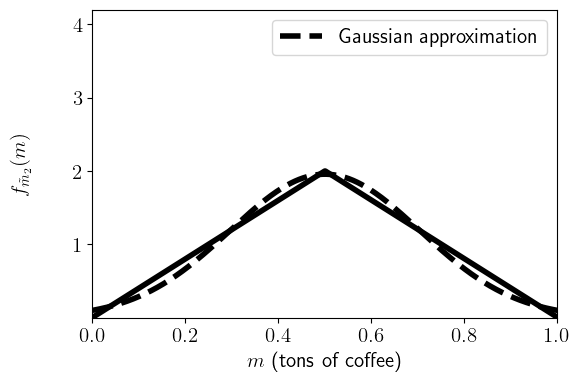

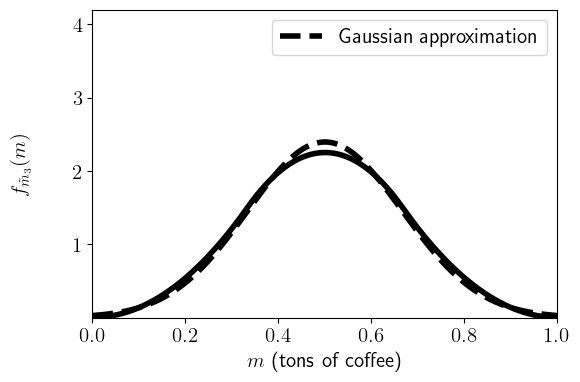

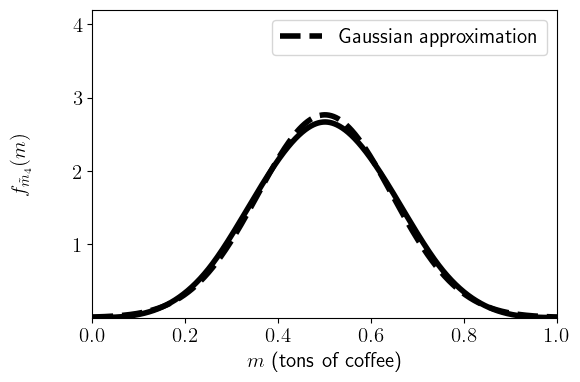

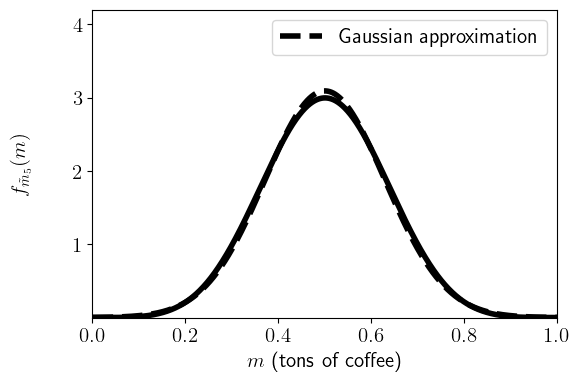

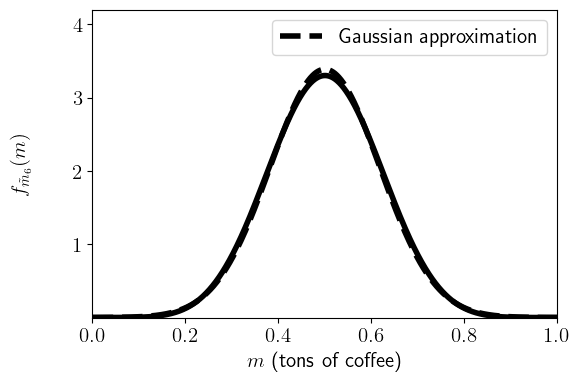

In [4]:
n_max = 6
n_vals = np.arange(1,n_max+1)

n_grid = int(1e3)
step = 1./n_grid
inds = np.linspace(step/2,1,n_grid)

xmin = 0
xmax = 1
ymax = 4.2

for n in n_vals: 

    pdf_aux = np.ones(n_grid) / n_grid
    
    variance = 1/12
    variance_average = variance/n
    
    for ind in range(n):
        if ind == 0:
            pdf_conv_aux = pdf_aux.copy()
        else:
            pdf_conv_aux = np.convolve(pdf_conv_aux,pdf_aux,mode='full')

    pdf = n_grid * pdf_aux
    pdf_conv = n * n_grid * pdf_conv_aux
    
    plt.figure(figsize=(6,4))
    plt.plot(inds,pdf_conv[:n*n_grid:n],color='black',lw=4)
    plt.plot(inds,norm.pdf(inds,0.5,np.sqrt(variance_average)),lw=4,color="black",ls="dashed",
    label='Gaussian approximation')
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks([1,2,3,4],fontsize=font_size_ticks)
    plt.ylim(0,ymax)
    plt.xlim(xmin,xmax)
    if n == 1:
        plt.ylabel(r"$f_{\tilde{m}_1}(m)$",fontsize=font_size,labelpad = 30)
    elif n==2:
        plt.ylabel(r"$f_{\tilde{m}_2}(m)$",fontsize=font_size,labelpad = 30)
    elif n==3:
        plt.ylabel(r"$f_{\tilde{m}_3}(m)$",fontsize=font_size,labelpad = 30)
    elif n==4:
        plt.ylabel(r"$f_{\tilde{m}_4}(m)$",fontsize=font_size,labelpad = 30)
    elif n==5:
        plt.ylabel(r"$f_{\tilde{m}_5}(m)$",fontsize=font_size,labelpad = 30)
    elif n==6:
        plt.ylabel(r"$f_{\tilde{m}_6}(m)$",fontsize=font_size,labelpad = 30)
    plt.xlabel(r"$m$ (tons of coffee)",fontsize=font_size)
    plt.legend(fontsize=font_size_legend)